<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/decision_tree_mushroom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("/content/drive/MyDrive/dataset/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

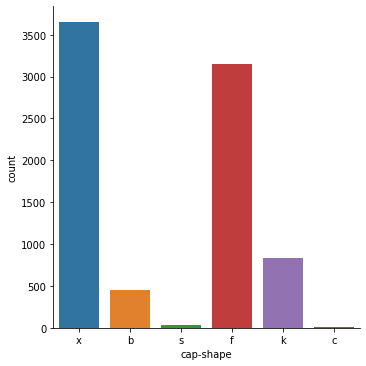

In [4]:
g = sns.catplot( x="cap-shape",kind='count', data=data,)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:411: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:411: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


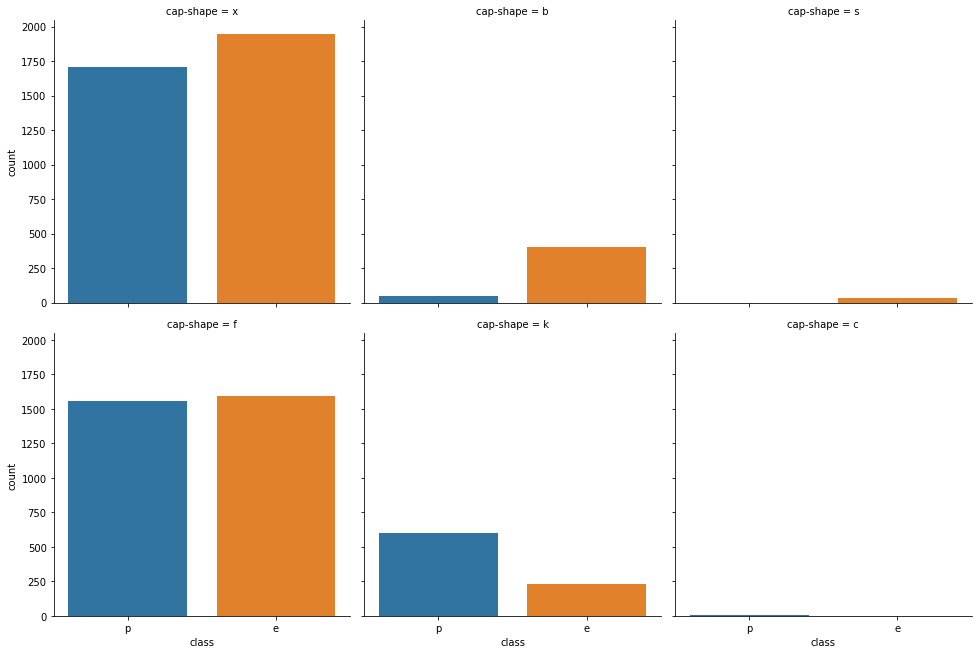

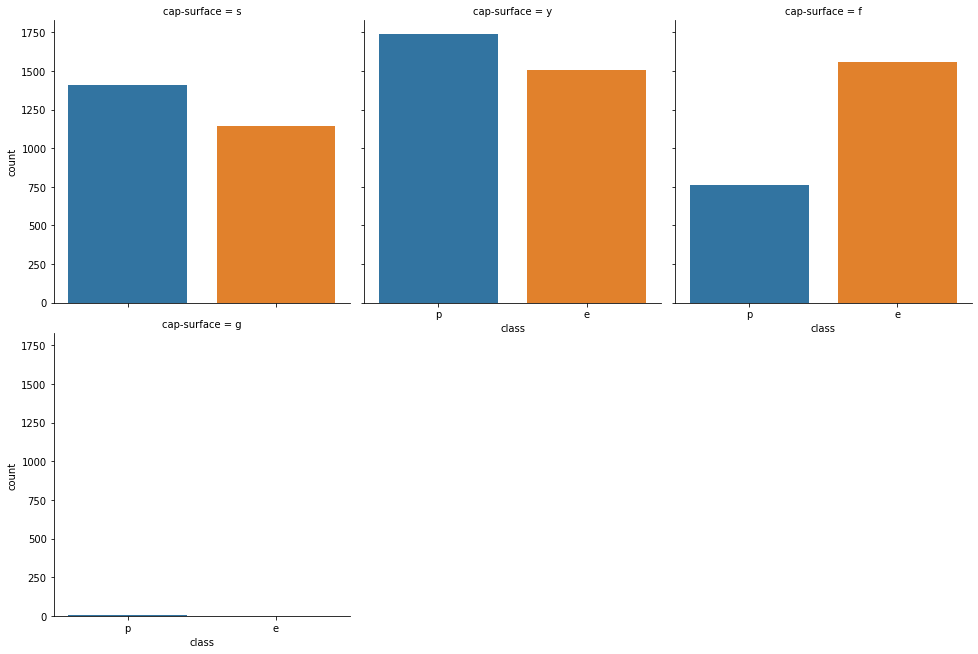

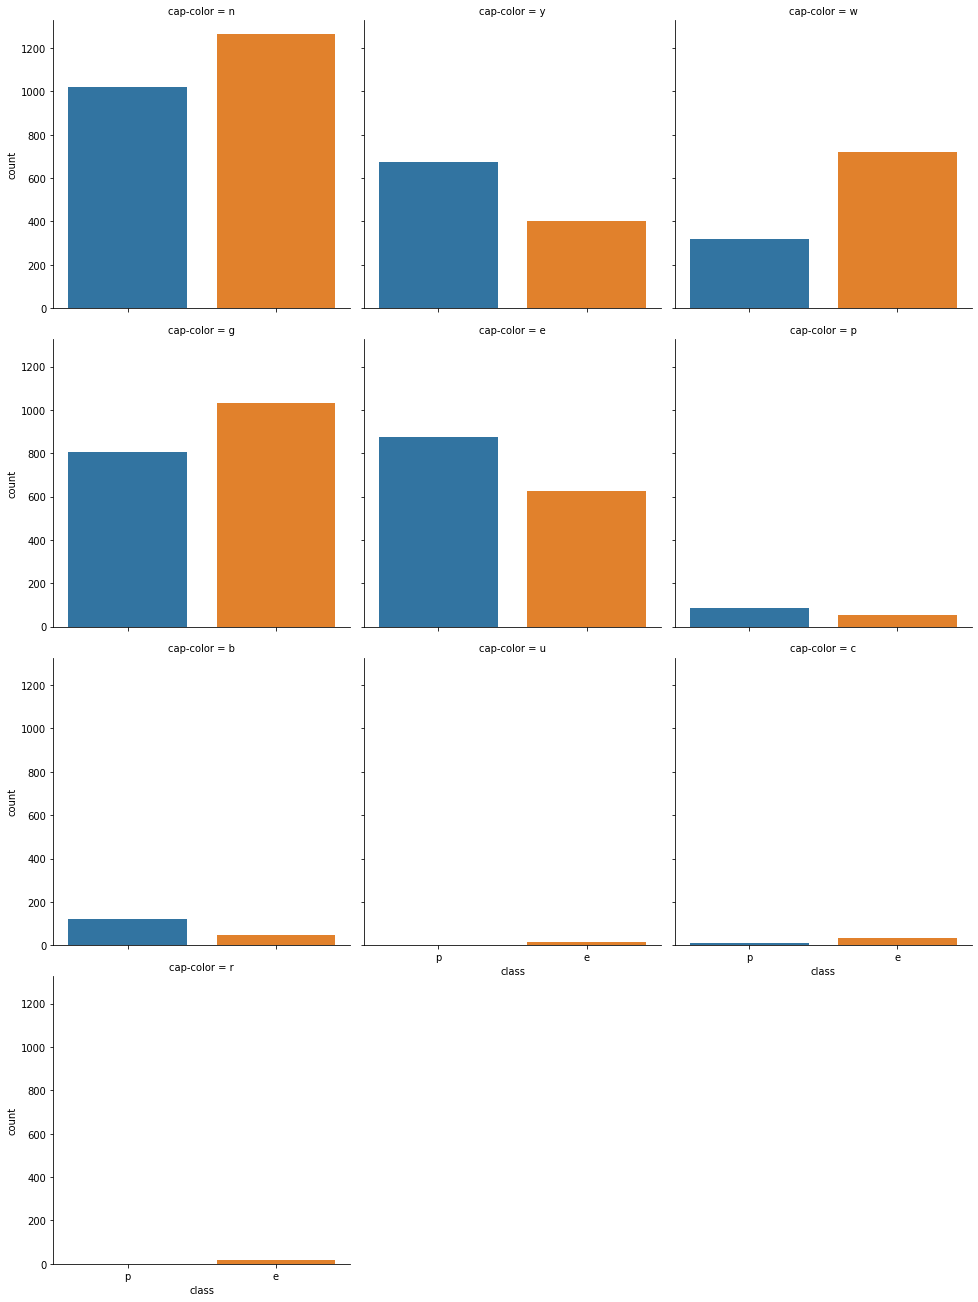

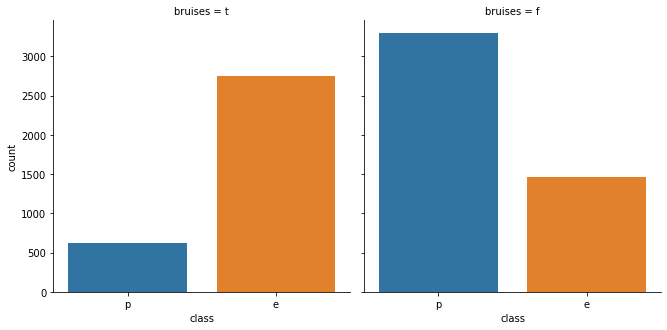

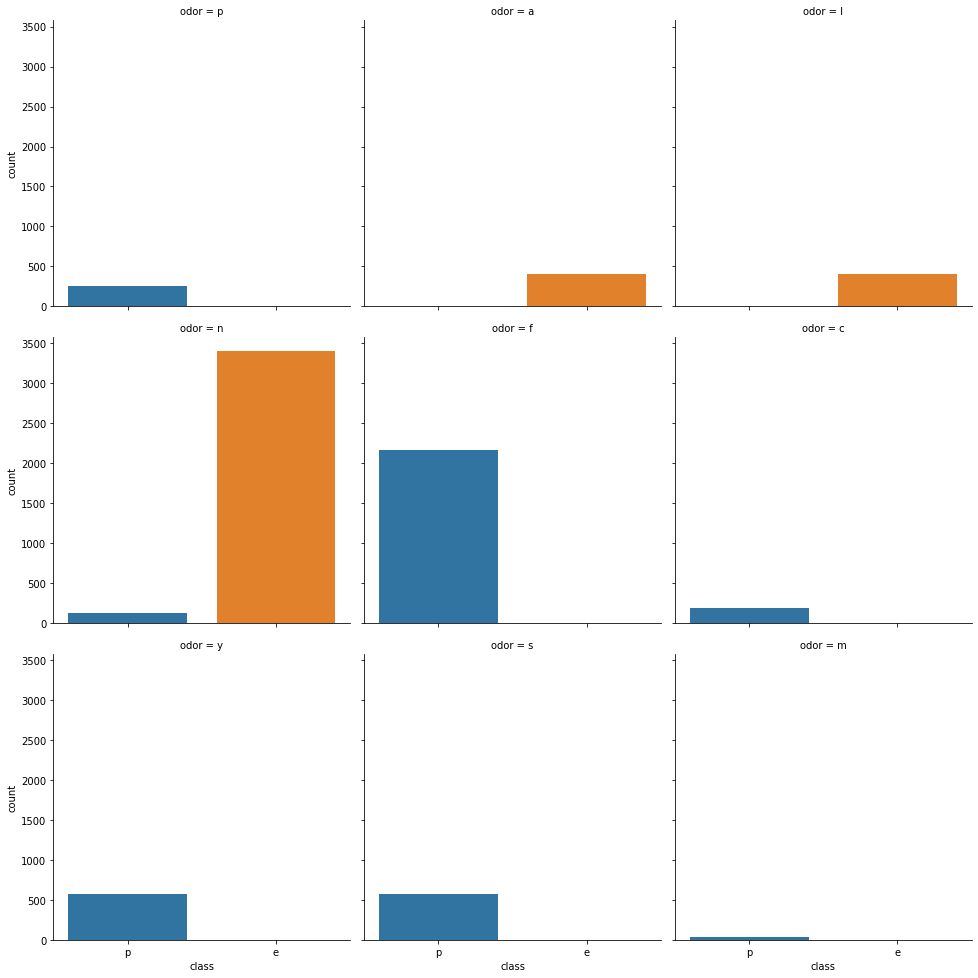

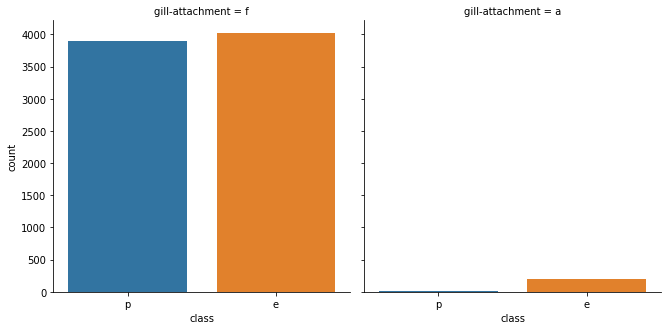

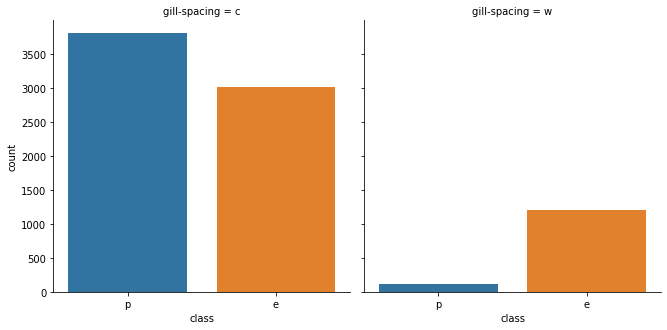

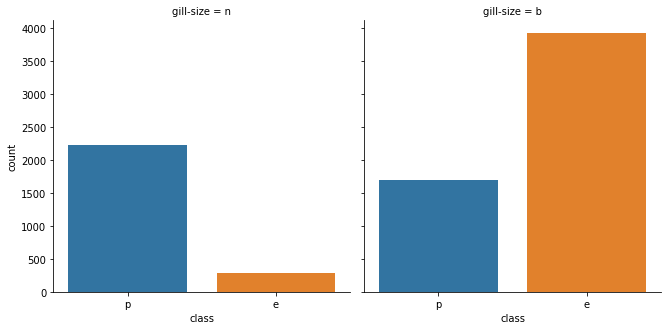

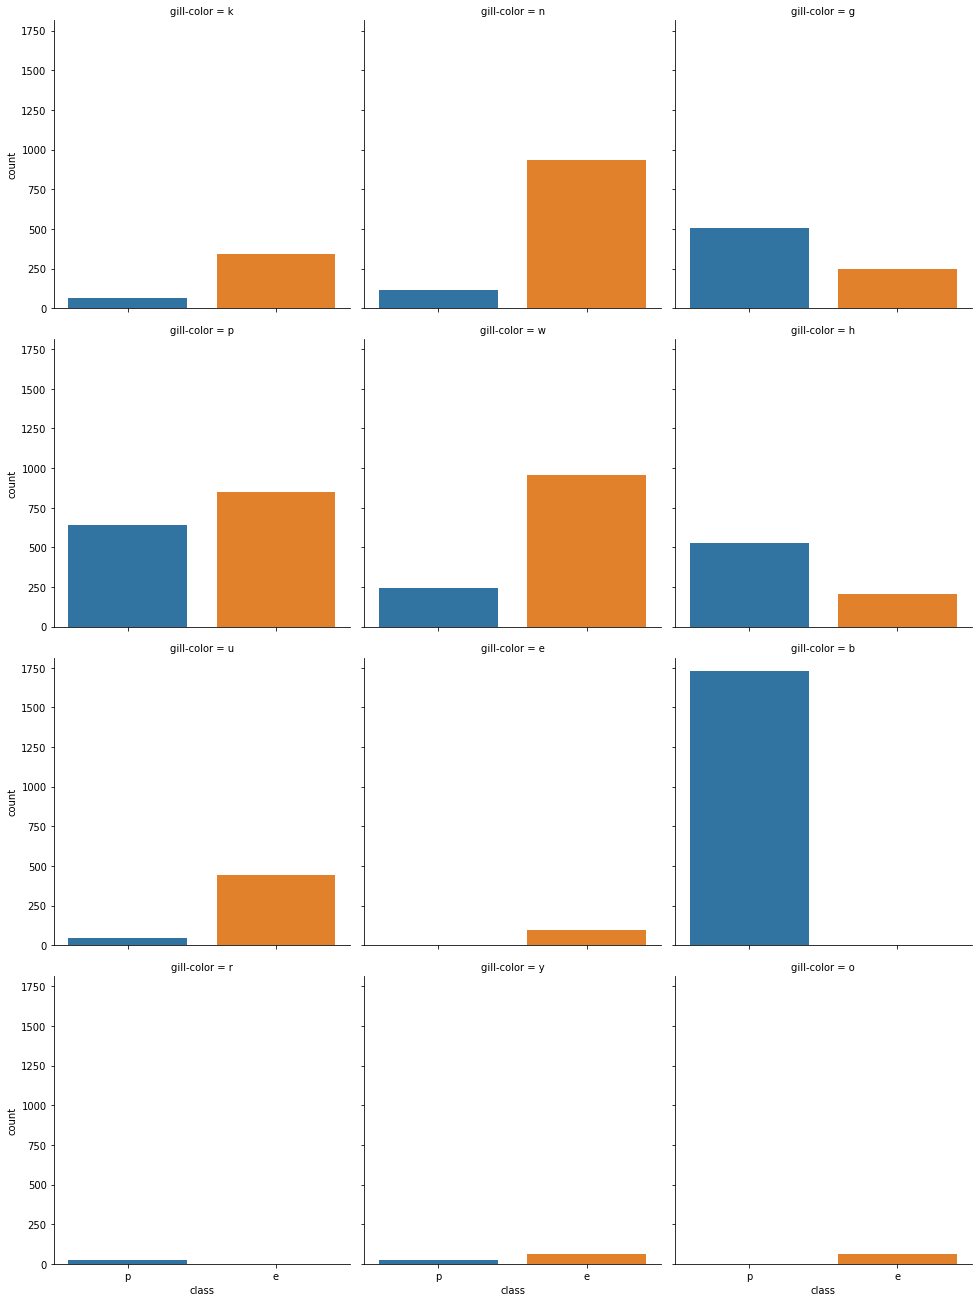

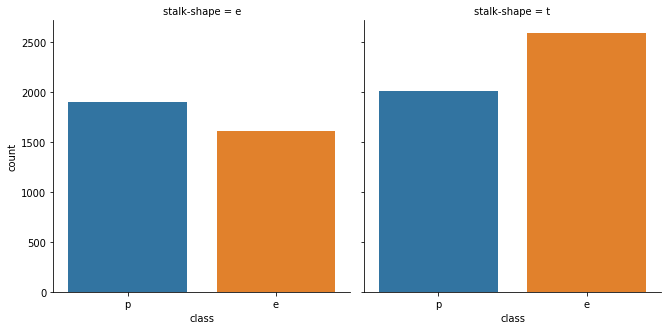

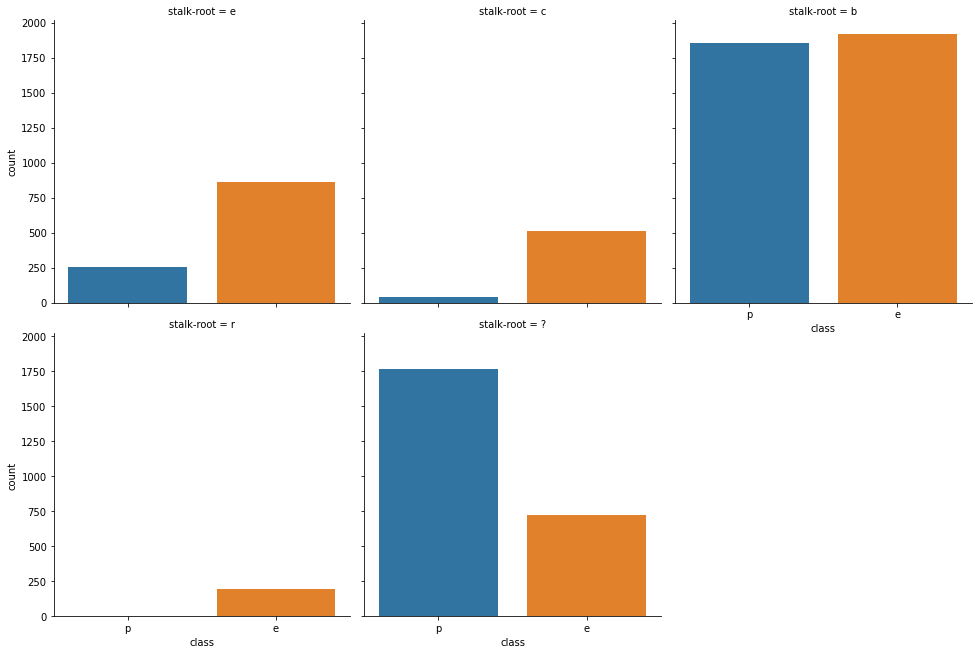

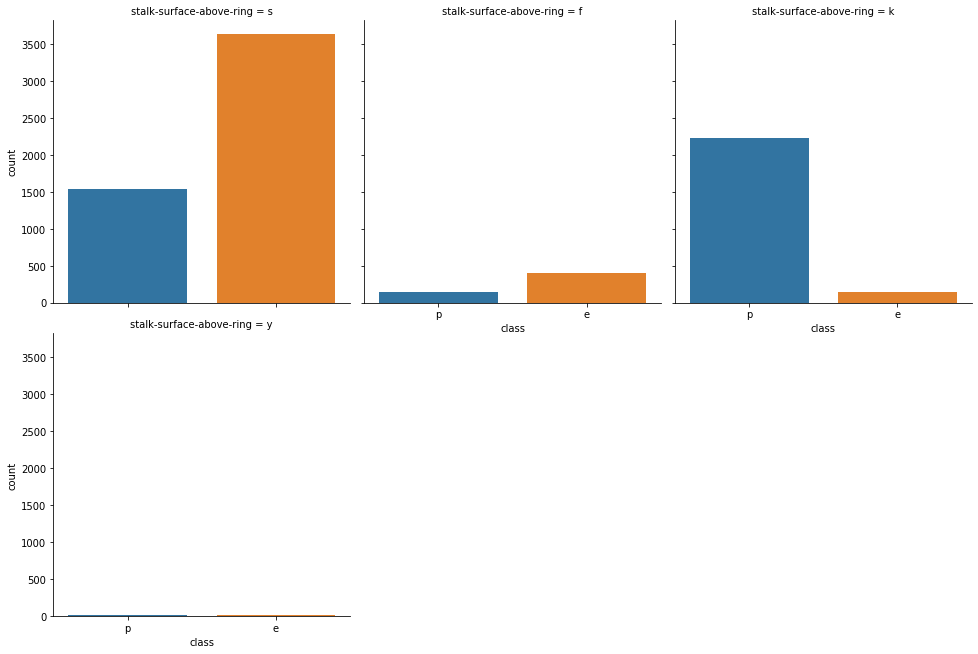

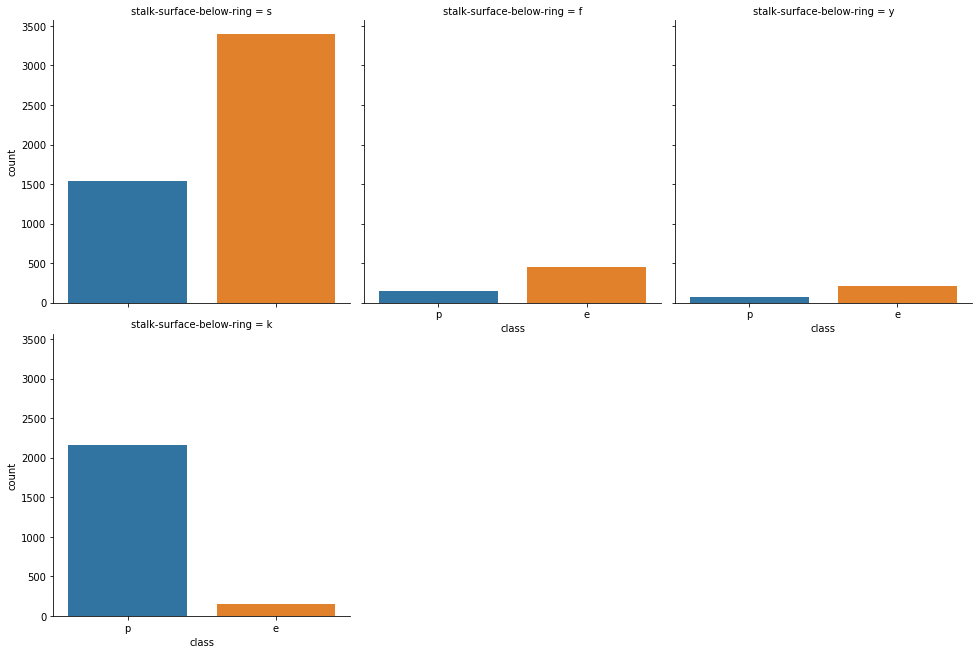

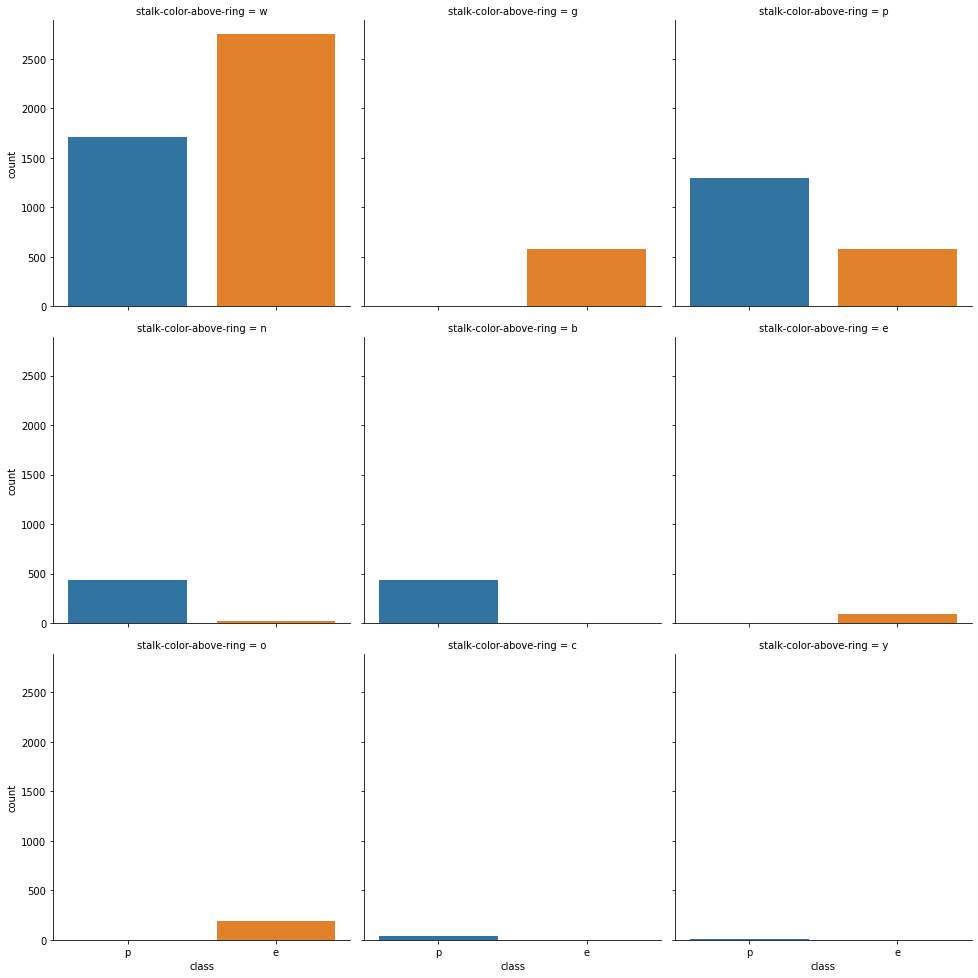

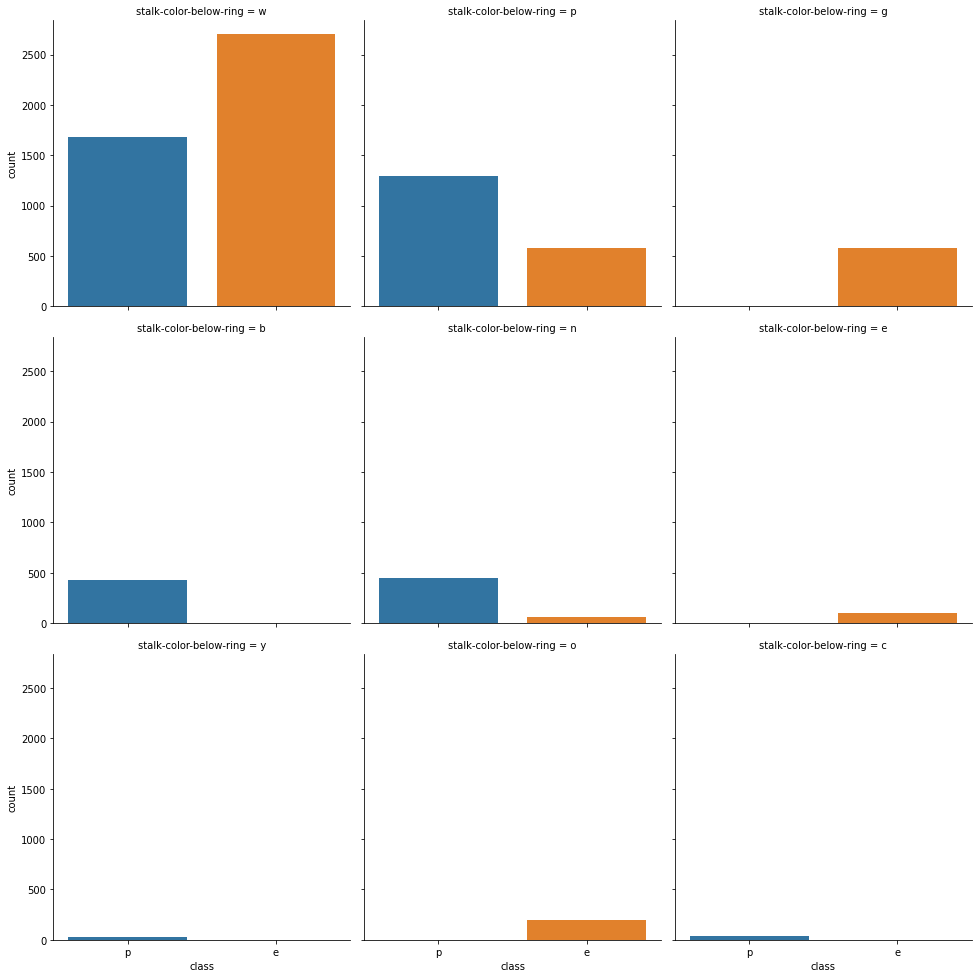

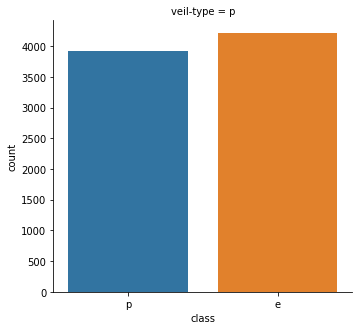

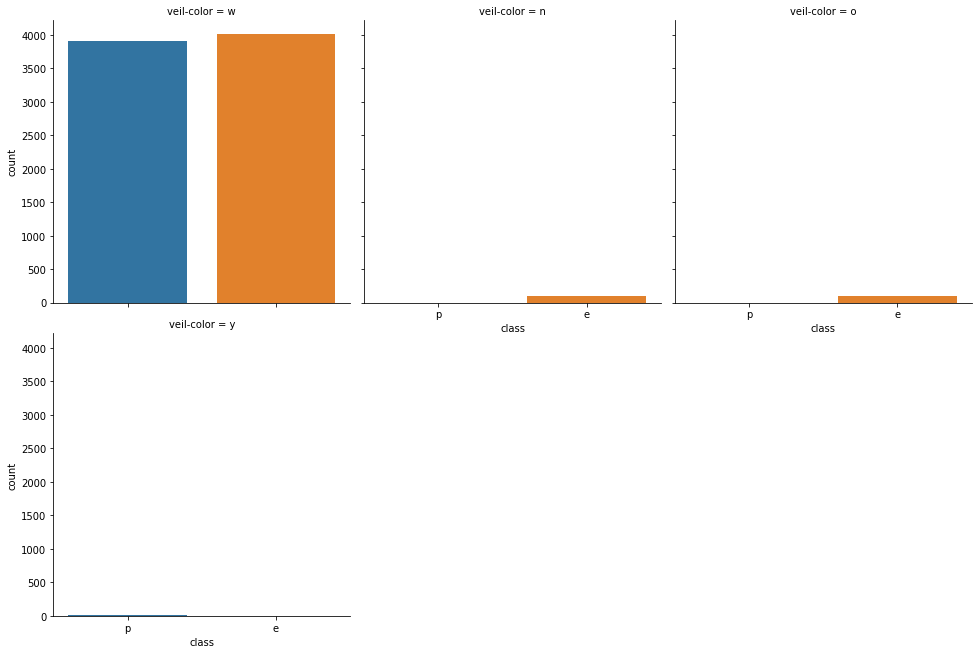

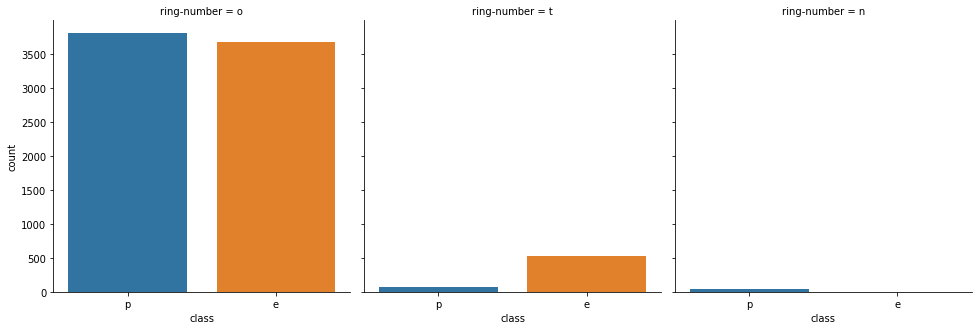

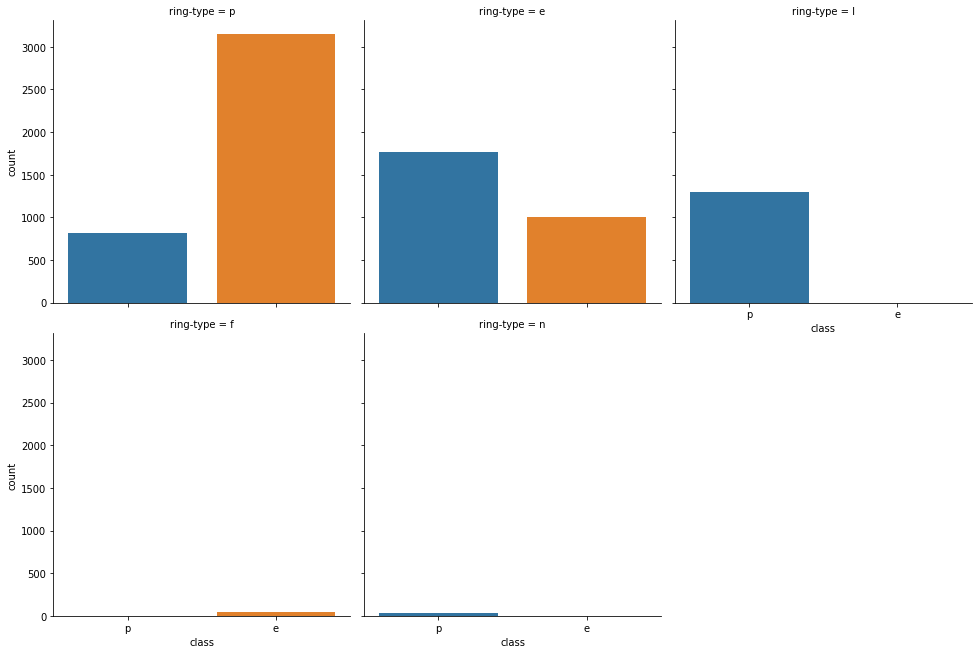

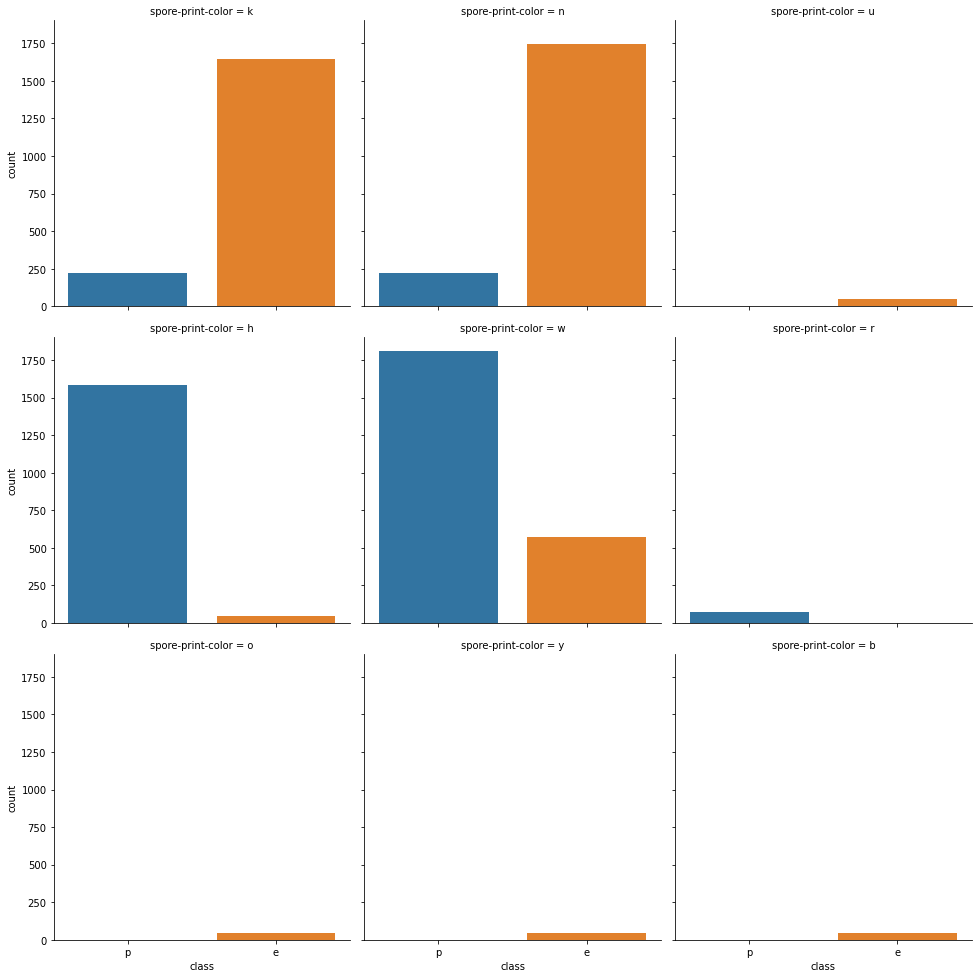

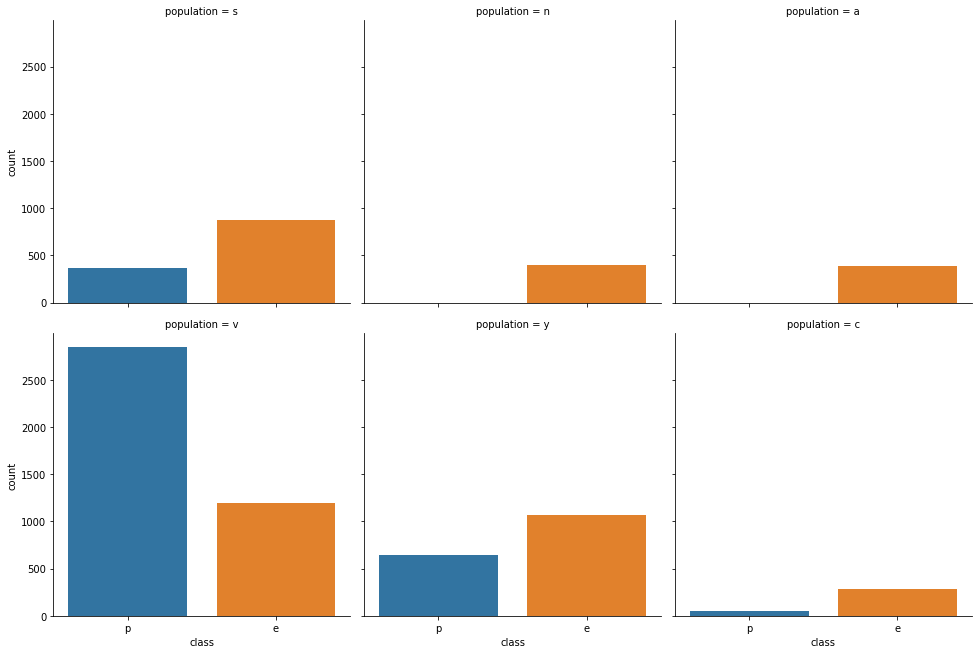

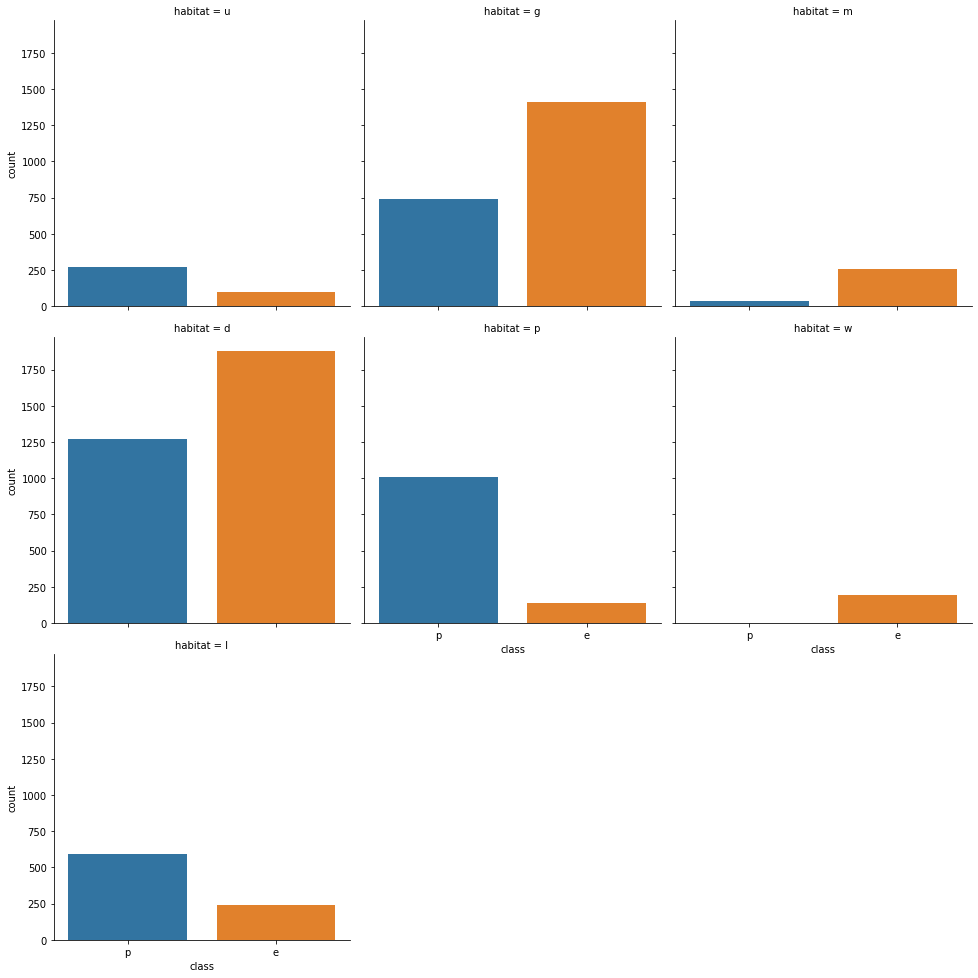

In [5]:
for x in data.columns[1:]:
  g = sns.catplot(x="class", col=x, col_wrap=3,
                data=data,
                kind="count", height=4.5, aspect=1)

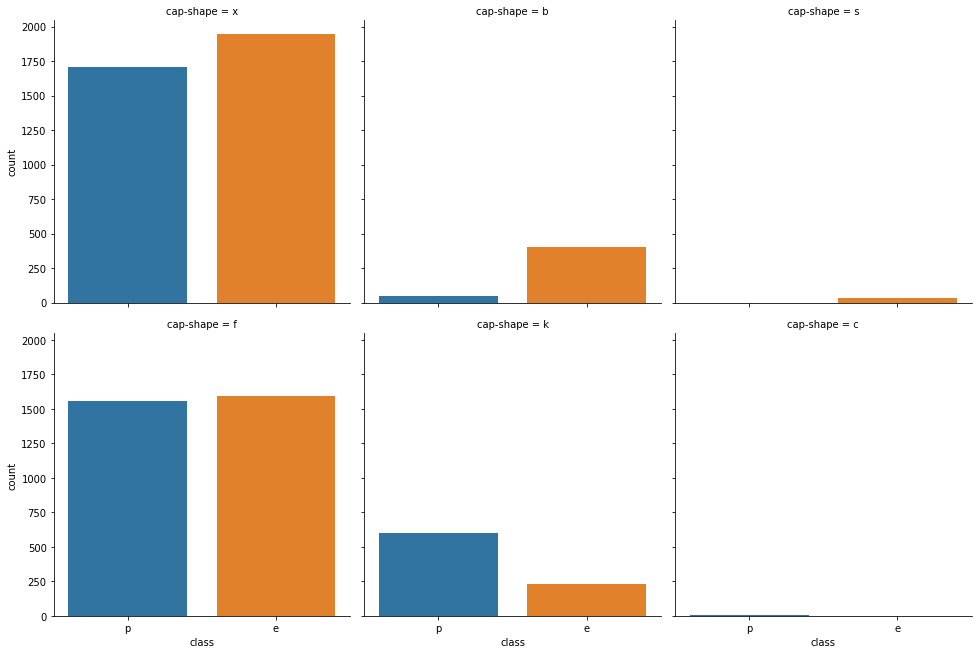

In [6]:
g = sns.catplot(x="class", col="cap-shape", col_wrap=3,
                data=data,
                kind="count", height=4.5, aspect=1)

In [17]:
from sklearn.preprocessing import LabelEncoder
x=data.drop(labels=['class'],axis=1).apply(LabelEncoder().fit_transform)

In [26]:
from sklearn.feature_selection import SelectKBest,chi2
test = SelectKBest(score_func=chi2, k="all")
fit = test.fit(x, data['class'])
fit.scores_

array([1.75083640e+01, 2.14068544e+02, 1.15113816e+01, 1.19427735e+03,
       7.59101632e+01, 3.50544682e+00, 8.26795274e+02, 1.63660683e+03,
       5.95776447e+03, 3.65941055e+01, 1.18602922e+03, 2.22982400e+02,
       2.06648180e+02, 1.19792216e+02, 1.09789410e+02,            nan,
       5.12682568e+00, 2.56463352e+01, 1.95061015e+03, 3.79132729e+02,
       3.11766736e+02, 7.51309489e+02])

In [28]:
scores=pd.DataFrame(fit.scores_,index=data.columns[1:])
scores.sort_values(by=0,ascending=False)

,0
gill-color,5957.764469
ring-type,1950.610146
gill-size,1636.606833
bruises,1194.277352
stalk-root,1186.029221
gill-spacing,826.795274
habitat,751.309489
spore-print-color,379.132729
population,311.766736
stalk-surface-above-ring,222.982400
